Compute every step manually

In [3]:
import numpy as np

# Linear regression
# f = w * x 
# here : f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass   
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Here we replace the manually computed gradient with autograd

In [6]:
import torch

# Linear regression
# f = w * x 
# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    # dw = gradient(X, Y, y_pred)
    l.backward()
    print("w.grad",w.grad) # dl/dw

    # update weights
    # w.data = w.data - learning_rate * w.grad
    # 이 내부에서 새로 생성된 텐서들은 requires_grad=False 상태가 되어, 메모리 사용량을 아껴준다.
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 1 == 0:

        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
w.grad tensor(-30.)
epoch 1: w = 0.300, loss = 30.00000000
w.grad tensor(-25.5000)
epoch 2: w = 0.555, loss = 21.67499924
w.grad tensor(-21.6750)
epoch 3: w = 0.772, loss = 15.66018772
w.grad tensor(-18.4238)
epoch 4: w = 0.956, loss = 11.31448650
w.grad tensor(-15.6602)
epoch 5: w = 1.113, loss = 8.17471695
w.grad tensor(-13.3112)
epoch 6: w = 1.246, loss = 5.90623236
w.grad tensor(-11.3145)
epoch 7: w = 1.359, loss = 4.26725292
w.grad tensor(-9.6173)
epoch 8: w = 1.455, loss = 3.08308983
w.grad tensor(-8.1747)
epoch 9: w = 1.537, loss = 2.22753215
w.grad tensor(-6.9485)
epoch 10: w = 1.606, loss = 1.60939169
w.grad tensor(-5.9062)
epoch 11: w = 1.665, loss = 1.16278565
w.grad tensor(-5.0203)
epoch 12: w = 1.716, loss = 0.84011245
w.grad tensor(-4.2673)
epoch 13: w = 1.758, loss = 0.60698116
w.grad tensor(-3.6272)
epoch 14: w = 1.794, loss = 0.43854395
w.grad tensor(-3.0831)
epoch 15: w = 1.825, loss = 0.31684780
w.grad tensor(-2.6206)
epoch 16

In [8]:
print(w)
print(w.item())

tensor(2.0000, requires_grad=True)
1.9999996423721313


In [2]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # 1. calculate gradients = backward pass
    l.backward()

    # 2. update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [17]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
# X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
# Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(X.shape) # torch.Size([4, 1])
print(f'#samples: {n_samples}, #features: {n_features}')
#samples: 4, #features: 1

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
        print("self.lin",self.lin)
        
    def forward(self, x):
        #print("forward!")
        return self.lin(x)

model = LinearRegression(input_size, output_size)
print("model",model)
print(">>>", model(X_test))

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:     
        [w, b] = model.parameters() # unpack parameters
        print("w",w)
        print("b",b)
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
print(">>>", model(X_test))


torch.Size([4, 1])
#samples: 4, #features: 1
self.lin Linear(in_features=1, out_features=1, bias=True)
model LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)
>>> tensor([4.1245], grad_fn=<AddBackward0>)
Prediction before training: f(5) = 4.124
w Parameter containing:
tensor([[0.9427]], requires_grad=True)
b Parameter containing:
tensor([0.3218], requires_grad=True)
epoch 1: w = 0.943, loss = 9.75332451
w Parameter containing:
tensor([[1.6618]], requires_grad=True)
b Parameter containing:
tensor([0.5462], requires_grad=True)
epoch 11: w = 1.662, loss = 0.30974153
w Parameter containing:
tensor([[1.7824]], requires_grad=True)
b Parameter containing:
tensor([0.5677], requires_grad=True)
epoch 21: w = 1.782, loss = 0.06207225
w Parameter containing:
tensor([[1.8066]], requires_grad=True)
b Parameter containing:
tensor([0.5570], requires_grad=True)
epoch 31: w = 1.807, loss = 0.05251795
w Parameter containing:
tensor([[1.8152]], requires_grad=True)
b Parameter c

(100, 1) (100,)
torch.Size([100, 1])
torch.Size([100])
100
torch.Size([100, 1])
epoch: 10, loss = ++++++4119.6753
epoch: 20, loss = ++++++2902.3110
epoch: 30, loss = ++++++2072.2920
epoch: 40, loss = ++++++1506.2522
epoch: 50, loss = ++++++1120.1570
epoch: 60, loss = +++++++856.7488
epoch: 70, loss = +++++++677.0066
epoch: 80, loss = +++++++554.3323
epoch: 90, loss = +++++++470.5912
epoch: 100, loss = +++++++413.4166
(100, 1)


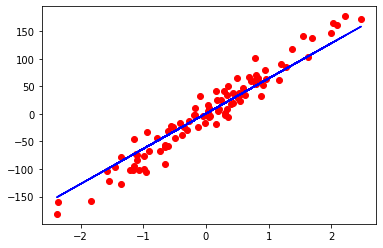

In [33]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(X_numpy.shape, y_numpy.shape) # (100, 1) (100,)
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X.shape) # torch.Size([100, 1])
print(y.shape) # torch.Size([100])
print(y.shape[0]) # 100
# 텐서의 모양을 변경하려면 torch.reshape를 사용
# 메모리 사용량도 염려하고 두 텐서가 동일한 데이터를 공유하도록 하려면 torch.view를 사용
y = y.view(y.shape[0], 1)
print(y.shape) # torch.Size([100, 1])

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():+>15.4f}')

# Plot
predicted = model(X).detach().numpy()
#predicted = model(X).clone().numpy() ->  RuntimeError: Can't call numpy() on Tensor that requires grad.
print(predicted.shape)

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [40]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(X.shape) # (569, 30) -> (455,30) + (114,30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape) # (455, 30)
print(y_train.shape) # (455,)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(X_train.shape) # torch.Size([455, 30])
print(y_train.shape) # torch.Size([455])
print(X_test.shape)  # torch.Size([114, 30])
print(y_test.shape)  # torch.Size([114])

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
print(y_train.shape) # torch.Size([455, 1])
print(y_test.shape)  # torch.Size([114, 1])

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # (30, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)
y_predicted = model(X_test)
print(X_test.shape)      # torch.Size([114, 30])
print(y_predicted.shape) # torch.Size([114, 1])
y_predicted_cls = y_predicted.round()
print(y_predicted_cls.eq(y_test))

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print(w.shape) # torch.Size([1, 30])
        print(b.shape) # torch.Size([1])
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# evaluate 할 때는 가중치가 업데이트가 되어서는 안된다. 
with torch.no_grad():
    y_predicted = model(X_test)
    print(X_test.shape)      # torch.Size([114, 30])
    print(y_predicted.shape) # torch.Size([114, 1])
    y_predicted_cls = y_predicted.round()
    print(y_predicted_cls.eq(y_test))
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')


(569, 30)
(455, 30)
(455,)
torch.Size([455, 30])
torch.Size([455])
torch.Size([114, 30])
torch.Size([114])
torch.Size([455, 1])
torch.Size([114, 1])
* torch.Size([114, 30])
torch.Size([114, 1])
tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
       

In [68]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1) # skiprows=1 -> header
        print(xy.shape)              # (178, 14)
        self.n_samples = xy.shape[0] # 178

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1] -> 열 벡터로 만들기 위함

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()
# get first sample and unpack
first_data = dataset[0] # csv파일 첫행을 읽어 온다
features, labels = first_data
print(features.shape, labels.shape) # torch.Size([13]) torch.Size([1])

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True, # False하면 배치사이즈만큼 1행부터 순서대로 가져온다
                          num_workers=0)
print(train_loader) # <torch.utils.data.dataloader.DataLoader object>

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features.shape, labels.shape) # torch.Size([4, 13]) torch.Size([4, 1])

# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
print(total_samples) # 178
n_iterations = math.ceil(total_samples/4) # 178/4 = 44.5 -> 45                     
print(total_samples, n_iterations)        # 178, 45
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # 4 x 44 + 2 x 1 -> 178 samples
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations} | Inputs {inputs.shape} | Labels {labels.shape}')

# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)


(178, 14)
torch.Size([13]) torch.Size([1])
torch.Size([4, 13]) torch.Size([4, 1])
178
178 45
Epoch: 1/2, Step 5/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45 | Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45 | Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45 | Inpu

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([3, 1, 28, 28]) torch.Size([3])
